In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [221]:
df=pd.read_csv('marriage.csv')

In [222]:
df

,id,gender,height,religion,caste,mother_tongue,profession,location,country,age_of_marriage
0,1,female,"5'4""",NaN,others,Telugu,NaN,London,United Kingdom,21.0
1,2,male,"5'7""",Jain,Shwetamber,Gujarati,Doctor / Healthcare Professional,Fairfax- VA,USA,32.0
2,3,male,"5'7""",Hindu,Brahmin,Hindi,Entrepreneurs / Business,Begusarai,India,32.0
3,4,female,"5'0""",Hindu,Thakur,Hindi,Architect,Mumbai,India,30.0
4,5,male,"5'5""",Christian,Born Again,Malayalam,Sales Professional / Marketing,Sulthan Bathery,India,30.0
...,...,...,...,...,...,...,...,...,...,...
2562,2563,female,"5'3""",Hindu,Thakur,Hindi,Banking Professional,Agra,India,27.0
2563,2564,male,"5'11""",Hindu,Thakur,Hindi,Software Professional,Ottawa,Canada,31.0
2564,2565,female,"5'3""",Hindu,Baishya,Bengali,Software Consultant,Bengaluru / Bangalore,India,28.0
2565,2566,female,"4'11""",NaN,others,Telugu,Not working,Hyderabad,India,26.0


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2567 entries, 0 to 2566
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2567 non-null   int64  
 1   gender           2538 non-null   object 
 2   height           2449 non-null   object 
 3   religion         1932 non-null   object 
 4   caste            2425 non-null   object 
 5   mother_tongue    2403 non-null   object 
 6   profession       2237 non-null   object 
 7   location         2412 non-null   object 
 8   country          2551 non-null   object 
 9   age_of_marriage  2548 non-null   float64
dtypes: float64(1), int64(1), object(8)
memory usage: 200.7+ KB


In [224]:
df.isnull().sum()

id                   0
gender              29
height             118
religion           635
caste              142
mother_tongue      164
profession         330
location           155
country             16
age_of_marriage     19
dtype: int64

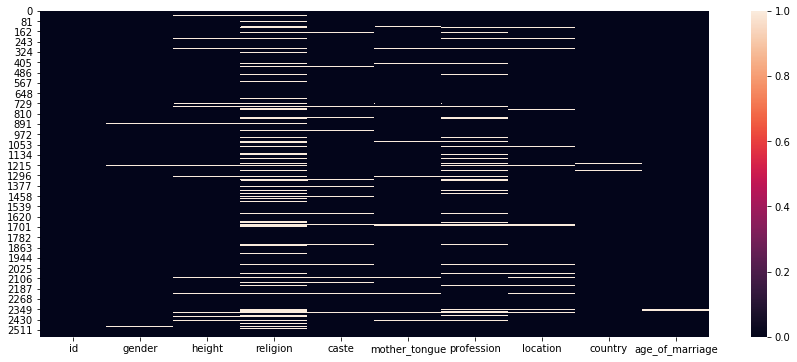

In [225]:
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull())

In [226]:
df=df.dropna()

In [205]:
df

,id,gender,height,religion,caste,mother_tongue,profession,location,country,age_of_marriage
1,2,male,"5'7""",Jain,Shwetamber,Gujarati,Doctor / Healthcare Professional,Fairfax- VA,USA,32.0
2,3,male,"5'7""",Hindu,Brahmin,Hindi,Entrepreneurs / Business,Begusarai,India,32.0
3,4,female,"5'0""",Hindu,Thakur,Hindi,Architect,Mumbai,India,30.0
4,5,male,"5'5""",Christian,Born Again,Malayalam,Sales Professional / Marketing,Sulthan Bathery,India,30.0
5,6,male,"5'5""",Hindu,Valmiki,Hindi,Sportsman,Delhi,India,29.0
...,...,...,...,...,...,...,...,...,...,...
2561,2562,male,"5'11""",Hindu,Kshatriya,Odia,VP / AVP / GM / DGM,Mumbai,India,30.0
2562,2563,female,"5'3""",Hindu,Thakur,Hindi,Banking Professional,Agra,India,27.0
2563,2564,male,"5'11""",Hindu,Thakur,Hindi,Software Professional,Ottawa,Canada,31.0
2564,2565,female,"5'3""",Hindu,Baishya,Bengali,Software Consultant,Bengaluru / Bangalore,India,28.0


In [206]:
df['height']=df['height'].str.replace("'",'.')

In [207]:
df['height']=df['height'].str.replace('"' ,",")

In [208]:
df['height']=df['height'].str.replace(",",'')

In [209]:
df['height']=df['height'].astype('float64')

In [210]:
df

,id,gender,height,religion,caste,mother_tongue,profession,location,country,age_of_marriage
1,2,male,5.70,Jain,Shwetamber,Gujarati,Doctor / Healthcare Professional,Fairfax- VA,USA,32.0
2,3,male,5.70,Hindu,Brahmin,Hindi,Entrepreneurs / Business,Begusarai,India,32.0
3,4,female,5.00,Hindu,Thakur,Hindi,Architect,Mumbai,India,30.0
4,5,male,5.50,Christian,Born Again,Malayalam,Sales Professional / Marketing,Sulthan Bathery,India,30.0
5,6,male,5.50,Hindu,Valmiki,Hindi,Sportsman,Delhi,India,29.0
...,...,...,...,...,...,...,...,...,...,...
2561,2562,male,5.11,Hindu,Kshatriya,Odia,VP / AVP / GM / DGM,Mumbai,India,30.0
2562,2563,female,5.30,Hindu,Thakur,Hindi,Banking Professional,Agra,India,27.0
2563,2564,male,5.11,Hindu,Thakur,Hindi,Software Professional,Ottawa,Canada,31.0
2564,2565,female,5.30,Hindu,Baishya,Bengali,Software Consultant,Bengaluru / Bangalore,India,28.0


In [211]:
df=df.drop(['id','location','mother_tongue'],axis=1)

In [212]:
df

,gender,height,religion,caste,profession,country,age_of_marriage
1,male,5.70,Jain,Shwetamber,Doctor / Healthcare Professional,USA,32.0
2,male,5.70,Hindu,Brahmin,Entrepreneurs / Business,India,32.0
3,female,5.00,Hindu,Thakur,Architect,India,30.0
4,male,5.50,Christian,Born Again,Sales Professional / Marketing,India,30.0
5,male,5.50,Hindu,Valmiki,Sportsman,India,29.0
...,...,...,...,...,...,...,...
2561,male,5.11,Hindu,Kshatriya,VP / AVP / GM / DGM,India,30.0
2562,female,5.30,Hindu,Thakur,Banking Professional,India,27.0
2563,male,5.11,Hindu,Thakur,Software Professional,Canada,31.0
2564,female,5.30,Hindu,Baishya,Software Consultant,India,28.0


In [213]:
le=LabelEncoder()
for i in list(df.columns):
    if df[i].dtype=='object':
        df[i]=le.fit_transform(df[i])

In [121]:
df

,gender,height,religion,caste,profession,country,age_of_marriage
1,1,5.70,2,34,22,19,32.0
2,1,5.70,1,14,25,5,32.0
3,0,5.00,1,36,7,5,30.0
4,1,5.50,0,13,68,5,30.0
5,1,5.50,1,38,74,5,29.0
...,...,...,...,...,...,...,...
2561,1,5.11,1,21,80,5,30.0
2562,0,5.30,1,36,9,5,27.0
2563,1,5.11,1,36,72,3,31.0
2564,0,5.30,1,7,71,5,28.0


In [122]:
x=df.drop(['age_of_marriage'],axis=1)

In [123]:
y=df[['age_of_marriage']]

In [124]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [125]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
preds1=rfr.predict(x_test)
score1=r2_score(y_test,preds1)

In [126]:
score1

0.6143275322135598

In [127]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
preds2=gbr.predict(x_test)
score2=r2_score(y_test,preds2)

In [128]:
score3

0.6630589419122235

In [129]:

rfe_selector = RFE(estimator=gbr, n_features_to_select=6, step=10, verbose=5)
rfe_selector.fit(x, y)
rfe_support = rfe_selector.get_support()
rfe_feature = x.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')


6 selected features


In [130]:
rfe_feature


['gender', 'height', 'religion', 'caste', 'profession', 'country']

In [131]:
rfe_selector = RFE(estimator=rfr, n_features_to_select=6, step=10, verbose=5)
rfe_selector.fit(x, y)
rfe_support = rfe_selector.get_support()
rfe_feature = x.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')


6 selected features


In [132]:
print(rfe_feature)

['gender', 'height', 'religion', 'caste', 'profession', 'country']


In [133]:
x=df[rfe_feature]

In [134]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [135]:
gbr.fit(x_train,y_train)
preds1=gbr.predict(x_test)
score3=r2_score(y_test,preds1)

In [136]:
score3

0.6956807311785198

In [137]:
rfr.fit(x_train,y_train)

preds=rfr.predict(x_test)
score=r2_score(y_test,preds)

In [138]:
score

0.6789000369640404

In [139]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [140]:
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  4.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [141]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [142]:
model = grid_search.best_estimator_


In [143]:
model.fit(x_train,y_train)
preds=model.predict(x_test)

In [144]:
score=r2_score(y_test,preds)

In [145]:
score

0.6093230499631233

In [173]:
gbr = GradientBoostingRegressor()
parameters = {
    "n_estimators":[5,10,15,20,30,40,50,60,70,100,120,150],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.001,0.1,0.5,1.0]
}

In [174]:
grid_search = GridSearchCV(estimator = gbr, param_grid = parameters, 
                          cv = 3)

In [175]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [176]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}

In [177]:
model2 = grid_search.best_estimator_


In [178]:
model2.fit(x_train,y_train)
preds3=model2.predict(x_test)
score3=r2_score(y_test,preds3)

In [179]:
score3

0.7105693707029967

In [180]:
joblib.dump(model2,'marriage_age_predictor.ml')

['marriage_age_predictor.ml']

In [214]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{' Australia': 0, ' Bahrain': 1, ' Bangladesh': 2, ' Canada': 3, ' Germany': 4, ' India': 5, ' Ireland': 6, ' Kuwait': 7, ' Malaysia': 8, ' Myanmar': 9, ' Netherlands': 10, ' New Zealand': 11, ' Norway': 12, ' Oman': 13, ' Pakistan': 14, ' Philippines': 15, ' Qatar': 16, ' Singapore': 17, ' South Africa': 18, ' USA': 19, ' United Arab Emirates': 20, ' United Kingdom': 21}


In [227]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['profession'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Accounting Professional (Others)': 0, 'Actor': 1, 'Admin Professional': 2, 'Advertising Professional': 3, 'Agent / Broker / Trader / Contractor': 4, 'Agricultural Professional (Others)': 5, 'Air Hostess / Flight Attendant': 6, 'Architect': 7, 'Artist (Others)': 8, 'Banking Professional': 9, 'Beautician': 10, 'Chartered Accountant': 11, 'Chef / Sommelier / Food Critic': 12, 'Civil Engineer': 13, 'Commercial Artist': 14, 'Company Secretary': 15, 'Consultant / Supervisor / Team Leads': 16, 'Customer Support / BPO / KPO Professional': 17, 'CxO / Chairman / Director / President': 18, 'Defense Services': 19, 'Dentist': 20, 'Designer (Others)': 21, 'Doctor / Healthcare Professional': 22, 'Electronics / Telecom Engineer': 23, 'Entertainment Professional': 24, 'Entrepreneurs / Business ': 25, 'Event Manager': 26, 'Farming': 27, 'Fashion Designer': 28, 'Finance Professional': 29, 'HR Professional': 30, 'Hairstylist': 31, 'Hardware & Networking professional': 32, 'Hotel & Hospitality Profession